In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import geopandas as gpd
from descartes import PolygonPatch

In [2]:
# function to load shapfiles in as a geopandas object
def load_shape_file(filepath):
    """Loads the shape file desired to mask a grid.
    Args:
        filepath: Path to *.shp file
    """
    shpfile = gpd.read_file(filepath)
    return shpfile

In [3]:
shp = load_shape_file('C:\\Users\srv_veralab\downloads\LMEs66.shp')
#shp.head() # .head gives you the first few lines, aka shapes

In [4]:
shp

,OBJECTID,LME_NUMBER,LME_NAME,GROUPING,ARCTIC,USLMES,Shape_Leng,Shape_Area,SUM_GIS_KM,geometry
0,1,23.0,Baltic Sea,None,None,None,219.326402,61.950021,3.951472e+05,"POLYGON ((10.97943973554271 54.38055038418429,..."
1,2,52.0,Sea of Okhotsk,None,None,None,145.932989,213.796584,1.561297e+06,"POLYGON ((156.7070450503869 51.18857905056069,..."
2,3,22.0,North Sea,None,None,None,209.486403,103.965247,6.938472e+05,"POLYGON ((5.278888225314518 61.98027038609212,..."
3,4,2.0,Gulf of Alaska,None,None,Yes,495.473780,211.045622,1.530668e+06,POLYGON ((-149.4114074707736 61.49637985210421...
4,5,9.0,Labrador - Newfoundland,Arctic,Arctic,None,270.847479,114.597691,9.077923e+05,(POLYGON ((-64.56793350674803 60.4550934642860...
5,6,24.0,Celtic-Biscay Shelf,None,None,None,214.311375,98.762349,7.616660e+05,"POLYGON ((-5.356777190768867 59.760917663572, ..."
6,7,50.0,Sea of Japan,None,None,None,89.078279,106.472324,9.895935e+05,"POLYGON ((142.0626470634855 45.9046249940651, ..."
7,8,51.0,Oyashio Current,None,None,None,55.987886,61.256528,5.343502e+05,"POLYGON ((157.0652135078091 51.14144984489218,..."
8,9,8.0,Scotian Shelf,None,None,None,87.605890,32.828978,2.848481e+05,POLYGON ((-55.46171569853431 44.91343688942089...
9,10,3.0,California Current,None,None,Yes,110.244423,215.804744,2.220709e+06,POLYGON ((-109.9114761349812 22.87832260107058...


In [5]:
# another way to view the same data (not as pretty)
print(shp)

    OBJECTID  LME_NUMBER                                  LME_NAME GROUPING  \
0          1        23.0                                Baltic Sea     None   
1          2        52.0                            Sea of Okhotsk     None   
2          3        22.0                                 North Sea     None   
3          4         2.0                            Gulf of Alaska     None   
4          5         9.0                   Labrador - Newfoundland   Arctic   
5          6        24.0                       Celtic-Biscay Shelf     None   
6          7        50.0                              Sea of Japan     None   
7          8        51.0                           Oyashio Current     None   
8          9         8.0                             Scotian Shelf     None   
9         10         3.0                        California Current     None   
10        11        62.0                                 Black Sea     None   
11        12         7.0          Northeast U.S. Con

In [6]:
### E2. What type of object is shp?

In [7]:
#A shapefile can be a point, line or polygon

In [8]:
from mpl_toolkits.basemap import Basemap

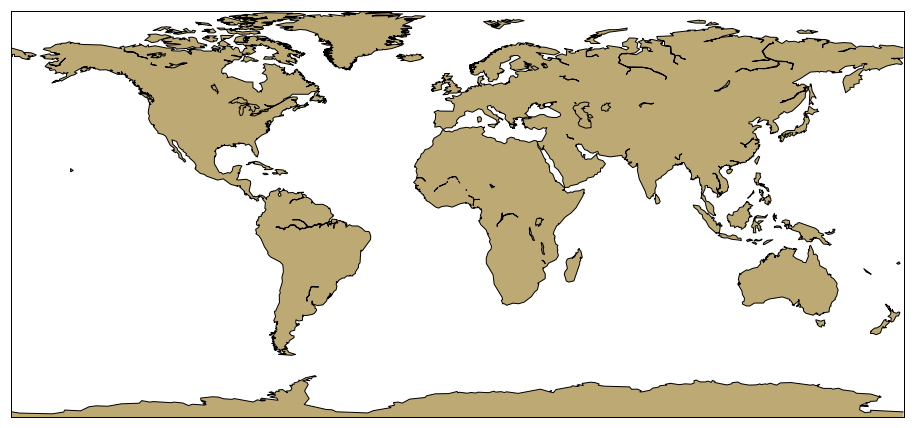

In [12]:
# Basic plot in basemap

ax = plt.figure(figsize=(16,20), facecolor = 'w')

# limits of plot
limN, limS, limE, limW = 84.,-80.,180,-180

#m = Basemap(projection='hammer',lon_0=0)
m = Basemap(projection='cyl', llcrnrlon=limW, \
      urcrnrlon=limE, llcrnrlat=limS, urcrnrlat=limN, resolution='c')
m.drawcoastlines()
m.drawmapboundary()
m.fillcontinents(color='#BDA973', lake_color='#BDA973');

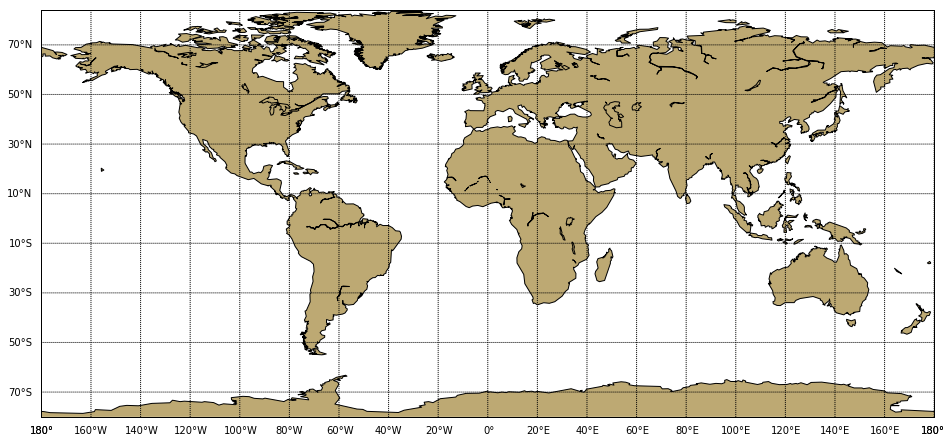

In [13]:
# add in some lat lon lines

ax = plt.figure(figsize=(16,20), facecolor = 'w')

# limits of plot
limN, limS, limE, limW = 84.,-80.,180,-180

#m = Basemap(projection='hammer',lon_0=0)
m = Basemap(projection='cyl', llcrnrlon=limW, \
      urcrnrlon=limE, llcrnrlat=limS, urcrnrlat=limN, resolution='c')
m.drawcoastlines()
m.drawmapboundary()
m.fillcontinents(color='#BDA973', lake_color='#BDA973');

parallels = np.arange(-90.,90,20.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# draw meridians
meridians = np.arange(-180.,180.,20.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10);


In [16]:
# for plotting the entire shapefile, we want the file name without the .shp extension
sppath= '/Users\srv_veralab\downloads\LMEs66'

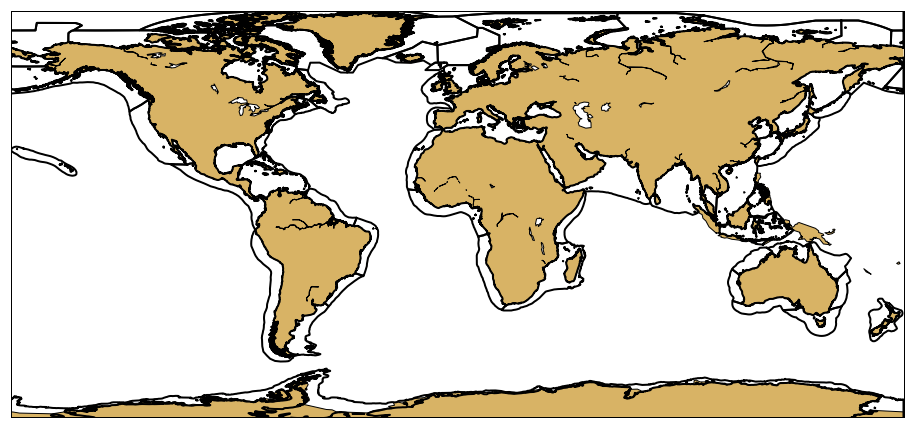

In [17]:
# plot in basemap with LME boundaries

ax = plt.figure(figsize=(16,20), facecolor = 'w')

# limits of plot
limN, limS, limE, limW = 84.,-80.,180,-180


#m = Basemap(projection='hammer',lon_0=0)
m = Basemap(projection='cyl', llcrnrlon=limW, \
      urcrnrlon=limE, llcrnrlat=limS, urcrnrlat=limN, resolution='c')
m.drawcoastlines()
m.drawmapboundary()
m.fillcontinents(color='#d8b365', lake_color='w')

m.readshapefile(sppath, 'LME') # the second argument is a name for the shapefile data inside the shapefile 

# plot all the shapes in the shapefile (magic black box code off of stack exchange):
for info, shape in zip(m.LME_info, m.LME):
        x, y = zip(*shape) 
        m.plot(x, y, marker=None,color='k', linewidth = '2')    

In [18]:
### E4. Change the color and the linewidth of the shapefile lines. 

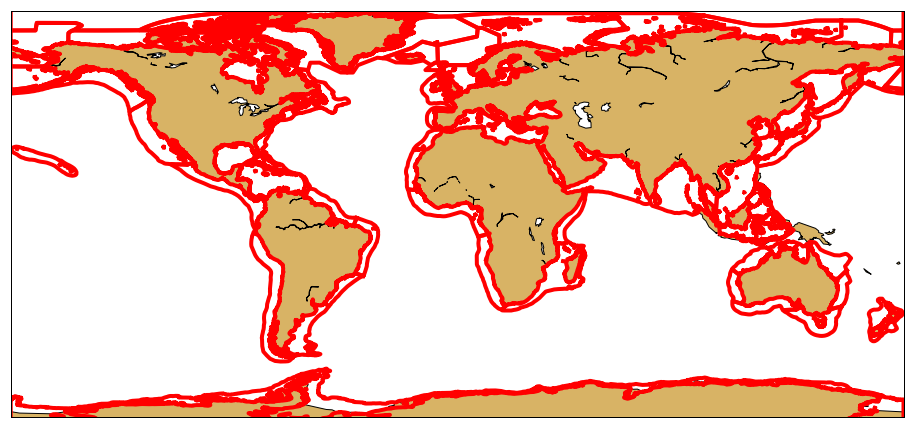

In [19]:
# plot in basemap with LME boundaries

ax = plt.figure(figsize=(16,20), facecolor = 'w')

# limits of plot
limN, limS, limE, limW = 84.,-80.,180,-180


#m = Basemap(projection='hammer',lon_0=0)
m = Basemap(projection='cyl', llcrnrlon=limW, \
      urcrnrlon=limE, llcrnrlat=limS, urcrnrlat=limN, resolution='c')
m.drawcoastlines()
m.drawmapboundary()
m.fillcontinents(color='#d8b365', lake_color='w')

m.readshapefile(sppath, 'LME') # the second argument is a name for the shapefile data inside the shapefile 

# plot all the shapes in the shapefile (magic black box code off of stack exchange):
for info, shape in zip(m.LME_info, m.LME):
        x, y = zip(*shape) 
        m.plot(x, y, marker=None,color='r', linewidth = '4')    

In [20]:
##3. Plotting shapfile polygons using cartopy and descartes

In [21]:
# function to pick out one shape from the shapefile
def select_shape(shpfile, category, name):
    """Select the submask of interest from the shapefile.
    Args:
        geopandas shpfile object: (from *.shp) loaded through `load_shape_file`
        category: (str) header of shape file from which to filter shape.
            (Run print(shpfile) to see options)
        name: (str) name of shape relative to category.
        plot: (optional bool) if True, plot the polygon that will be masking.
    Returns:
        shapely polygon
    Example:
        from esmask.mask import load_shape_file, select_shape
        LME = load_shape_file('LMEs.shp')
        CalCS = select_shape(LME, 'LME_NAME', 'California Current')
    """
    s = shpfile
    polygon = s[s[category] == name]
    polygon = polygon.geometry[:].unary_union #magic black box off of stack exchange (should paste link), concatinating polygons
    return polygon

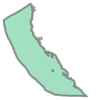

In [22]:
# note the is using the "LME_NAME" category from the geopandas shapefile object
CalCS_shp = select_shape(shp, 'LME_NAME', 'California Current')
CalCS_shp

In [23]:
### E5. What kind of object is CalCS_shp?

In [24]:
#CalCS_SHP is a polygon

In [27]:
#E6. Make the same plot as above for a) the Gulf of Alaska and b) Labrador - Newfoundland LMEs

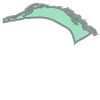

In [25]:
# note the is using the "LME_NAME" category from the geopandas shapefile object
GOA_shp = select_shape(shp, 'LME_NAME', 'Gulf of Alaska')
GOA_shp

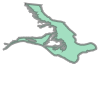

In [26]:
# note the is using the "LME_NAME" category from the geopandas shapefile object
Labrador_shp = select_shape(shp, 'LME_NAME', 'Labrador - Newfoundland')
Labrador_shp

In [28]:
# Riley's functions for making pretty map plots


def lat_lon_formatter(ax):
    """
    Creates nice latitude/longitude labels
    for maps
    """
    lon_formatter = cticker.LongitudeFormatter()
    lat_formatter = cticker.LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.tick_params(labelsize=16)
    
# the below function uses lat_lon_formatter above
def set_up_map(ax, x0, x1, y0, y1):
    """
    Adds coastline, etc.
    
    x0, x1: longitude bounds to zoom into
    y0, y1: latitude bounds to zoom into
    """
    # set up land overlay
    ax.add_feature(cfeature.LAND, facecolor='k')
    
    # zoom in on region of interest
    ax.set_extent([x0, x1, y0, y1])
    
    # set nicer looking ticks
    ax.set_xticks(np.arange(x0, x1, 10), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(y0, y1, 10), crs=ccrs.PlateCarree())
    lat_lon_formatter(ax)

C:\ProgramData\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


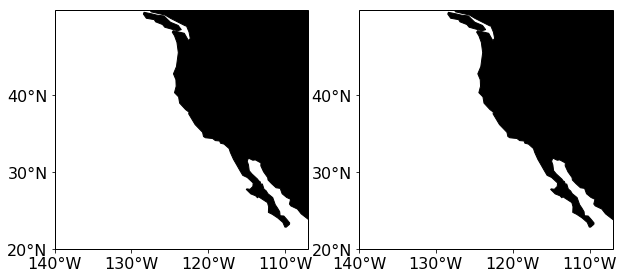

In [29]:
f, ax = plt.subplots(ncols=2, figsize=(10,5),
                     subplot_kw=dict(projection=ccrs.PlateCarree())) # this last bit is the map projection from Cartopy
set_up_map(ax[0], -140, -107, 20, 50)
set_up_map(ax[1], -140, -107, 20, 50)

In [30]:
#E7. How would you change the color of the land in the above? Try it

In [31]:
# Riley's functions for making pretty map plots


def lat_lon_formatter(ax):
    """
    Creates nice latitude/longitude labels
    for maps
    """
    lon_formatter = cticker.LongitudeFormatter()
    lat_formatter = cticker.LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.tick_params(labelsize=16)
    
# the below function uses lat_lon_formatter above
def set_up_map(ax, x0, x1, y0, y1):
    """
    Adds coastline, etc.
    
    x0, x1: longitude bounds to zoom into
    y0, y1: latitude bounds to zoom into
    """
    # set up land overlay
    ax.add_feature(cfeature.LAND, facecolor='r')
    
    # zoom in on region of interest
    ax.set_extent([x0, x1, y0, y1])
    
    # set nicer looking ticks
    ax.set_xticks(np.arange(x0, x1, 10), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(y0, y1, 10), crs=ccrs.PlateCarree())
    lat_lon_formatter(ax)

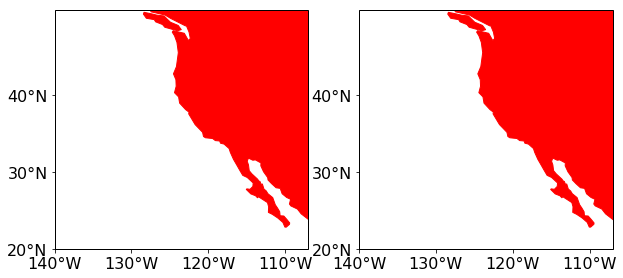

In [32]:
f, ax = plt.subplots(ncols=2, figsize=(10,5),
                     subplot_kw=dict(projection=ccrs.PlateCarree())) # this last bit is the map projection from Cartopy
set_up_map(ax[0], -140, -107, 20, 50)
set_up_map(ax[1], -140, -107, 20, 50)

In [33]:
from descartes import PolygonPatch

In [34]:
# look at the help files for PolygonPatch
help(PolygonPatch)

# here alpha is the transparency

Help on function PolygonPatch in module descartes.patch:

PolygonPatch(polygon, **kwargs)
    Constructs a matplotlib patch from a geometric object
    
    The `polygon` may be a Shapely or GeoJSON-like object with or without holes.
    The `kwargs` are those supported by the matplotlib.patches.Polygon class
    constructor. Returns an instance of matplotlib.patches.PathPatch.
    
    Example (using Shapely Point and a matplotlib axes):
    
      >>> b = Point(0, 0).buffer(1.0)
      >>> patch = PolygonPatch(b, fc='blue', ec='blue', alpha=0.5)
      >>> axis.add_patch(patch)



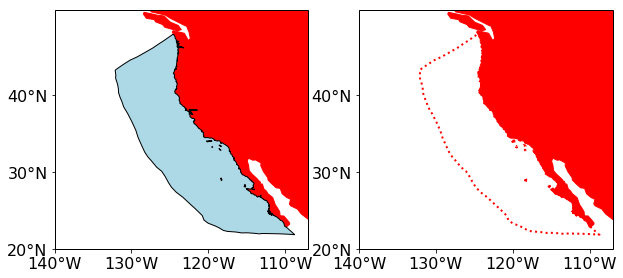

In [35]:
f, ax = plt.subplots(ncols=2, figsize=(10,5),
                     subplot_kw=dict(projection=ccrs.PlateCarree()))
set_up_map(ax[0], -140, -107, 20, 50)
set_up_map(ax[1], -140, -107, 20, 50)

# add shapefile to map
ax[0].add_patch(PolygonPatch(CalCS_shp, fc='#add8e6')) # Note PolygonPatch takes all the matplotlib commands
# some other attributes to play around with
ax[1].add_patch(PolygonPatch(CalCS_shp, fc='None', ec='r', linewidth=2,
                             linestyle=':')) # fc= "None is needed to make the inside of the shape transparent"

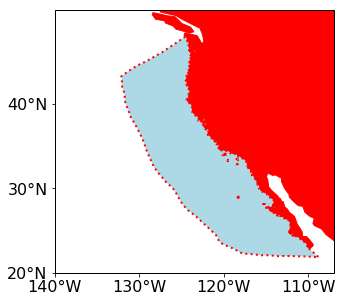

In [40]:
# let's plot them on top of each other

fig= plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
set_up_map(ax, -140, -107, 20, 50)

# plot the shapefile in blue with a red dotted boundary
ax.add_patch(PolygonPatch(CalCS_shp, fc='None', ec='r', linewidth=2,
                             linestyle=':'))
ax.add_patch(PolygonPatch(CalCS_shp, fc='#add8e6', ec = 'None', alpha = 1, zorder = 0))

In [37]:
#E8. Change zorder to 10 in the last line above, and omit the ec statement. What changes? What happened?

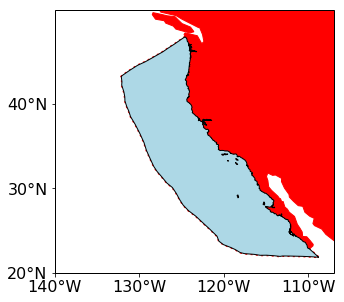

In [41]:
# let's plot them on top of each other

fig= plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
set_up_map(ax, -140, -107, 20, 50)

# plot the shapefile in blue with a red dotted boundary
ax.add_patch(PolygonPatch(CalCS_shp, fc='None', ec='r', linewidth=2,
                             linestyle=':'))
ax.add_patch(PolygonPatch(CalCS_shp, fc='#add8e6', alpha = 1, zorder = 10))

In [42]:
#E9. Find the four East Pacific LMES and plot them in different colors on the same map

In [ ]:
# let's plot them on top of each other

fig= plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
set_up_map(ax, -140, -107, 20, 50)

# plot the shapefile in blue with a red dotted boundary
ax.add_patch(PolygonPatch(CalCS_shp, fc='None', ec='r', linewidth=2,
                             linestyle=':'))
ax.add_patch(PolygonPatch(CalCS_shp, fc='#add8e6', ec = 'None', alpha = 1, zorder = 0))